# Feasibility modeling



A more complicated example involves minimizing in two dimensions, where some parts of the parameter space are off-limits. Let's minimize Himmelblau's function, subject to the constraint that $x_1^2 + x_2^2 < 50$

Text(0, 0.5, 'x2')

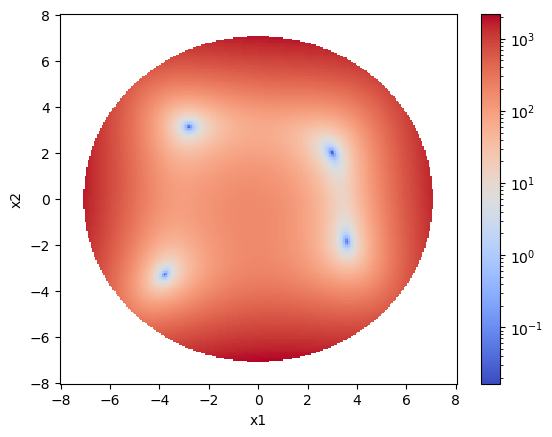

In [1]:
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
from bloptools import test_functions

x1 = x2 = np.linspace(-8, 8, 256)
X1, X2 = np.meshgrid(x1, x2)
from bloptools.tasks import Task

task = Task(key="himmelblau", kind="min")
F = test_functions.himmelblau(X1, X2)
F[X1**2 + X2**2 > 50] = np.nan

plt.pcolormesh(x1, x2, F, norm=mpl.colors.LogNorm(), shading="auto")
plt.colorbar()
plt.xlabel("x1")
plt.ylabel("x2")

where everything outside our constraint is undefined. In our digestion function, we return a `NaN` when we violate the constraint:

In [2]:
def digestion(db, uid):
    products = db[uid].table()

    for index, entry in products.iterrows():
        if entry.x1**2 + entry.x2**2 < 50:
            products.loc[index, "himmelblau"] = test_functions.himmelblau(entry.x1, entry.x2)
        else:
            products.loc[index, "himmelblau"] = np.nan

    return products

and create the agent in the usual way:



Transient Scan ID: 1     Time: 2023-07-16 19:48:57
Persistent Unique Scan ID: '6b14cbda-c2fa-471a-a4b7-332355b0233e'


New stream: 'primary'
+-----------+------------+------------+------------+
|   seq_num |       time |         x1 |         x2 |
+-----------+------------+------------+------------+
 failed to format row 
 failed to format row 
 failed to format row 
 failed to format row 
 failed to format row 
 failed to format row 
 failed to format row 
 failed to format row 
 failed to format row 
 failed to format row 
 failed to format row 
 failed to format row 
 failed to format row 
 failed to format row 
 failed to format row 
 failed to format row 
 failed to format row 
 failed to format row 
 failed to format row 
 failed to format row 
 failed to format row 
 failed to format row 
 failed to format row 
 failed to format row 
 failed to format row 
 failed to format row 
 failed to format row 
 failed to format row 
 failed to format row 
 failed to format row 
 failed to format row 
 failed to format row 


+-----------+------------+------------+------------+
generator list_scan ['6b14cbda'] (scan num: 1)





/usr/share/miniconda3/envs/bloptools-py3.10/lib/python3.10/site-packages/botorch/models/utils/assorted.py:201: InputDataWarning: Input data is not standardized. Please consider scaling the input to zero mean and unit variance.
  warnings.warn(msg, InputDataWarning)


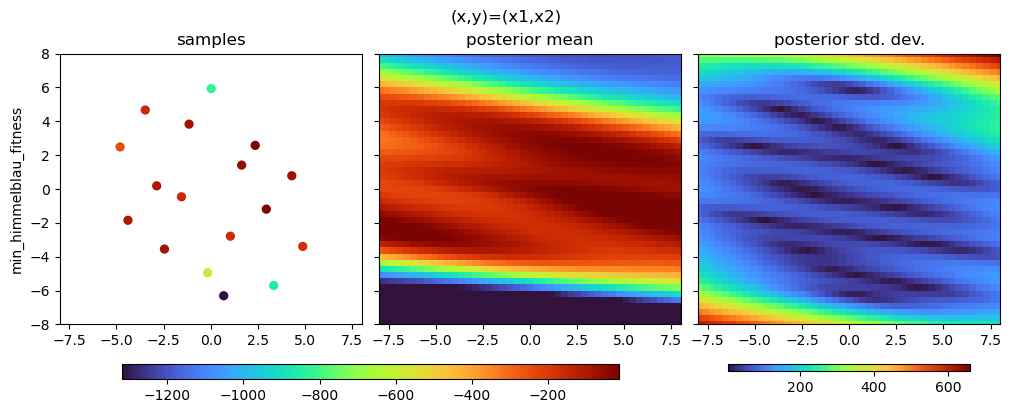

In [3]:
%run -i ../../../examples/prepare_bluesky.py # prepare the bluesky environment

import bloptools
from bloptools.tasks import Task

dofs = bloptools.devices.dummy_dofs(n=2)
bounds = [(-8, 8), (-8, 8)]

task = Task(key="himmelblau", kind="min")

agent = bloptools.bayesian.Agent(
    active_dofs=dofs,
    passive_dofs=[],
    active_dof_bounds=bounds,
    tasks=[task],
    digestion=digestion,
    db=db,
)

RE(agent.initialize(acqf="qr", n_init=32))

agent.plot_tasks()

In addition to modeling the fitness of the task, the agent models the probability that an input will be feasible:

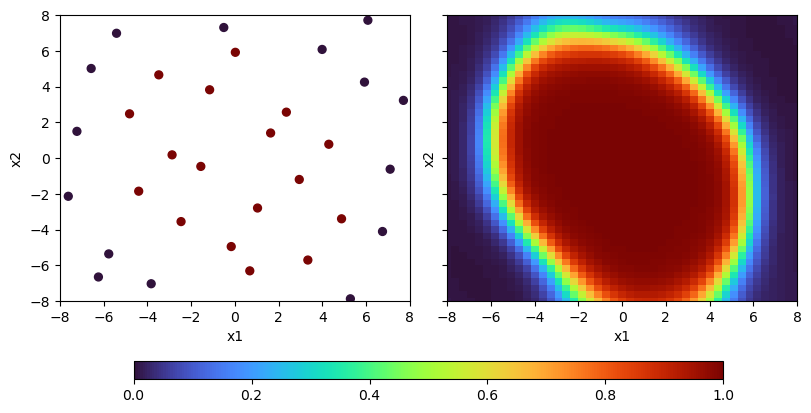

In [4]:
agent.plot_feasibility()

It combines the estimate of the objective and the estimate of the feasibility in deciding where to go:

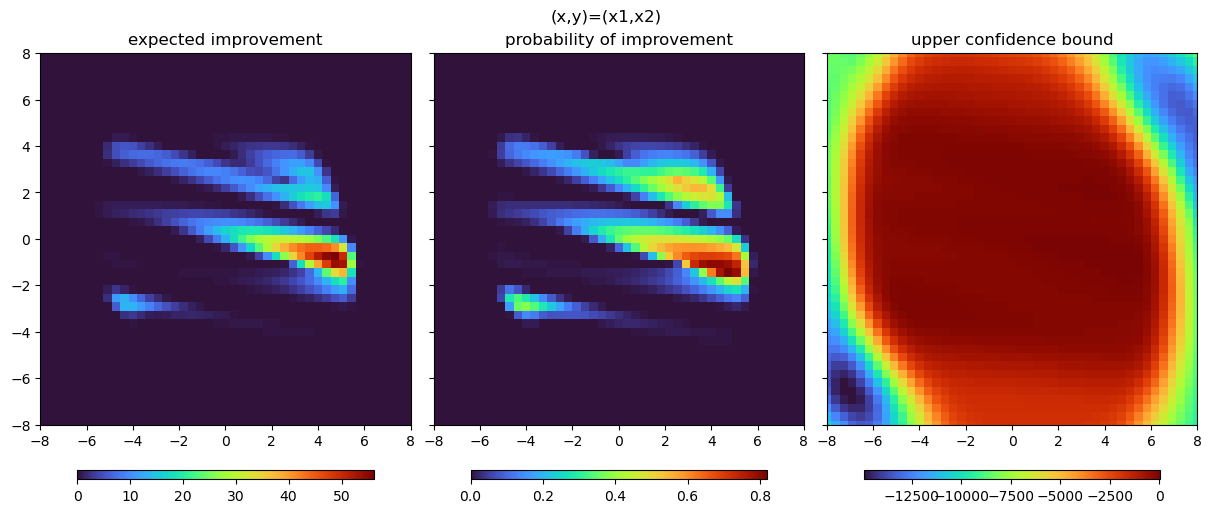

In [5]:
agent.plot_acquisition(acqf=["ei", "pi", "ucb"])

In [6]:
RE(agent.learn("ei", n_iter=4))



Transient Scan ID: 2     Time: 2023-07-16 19:49:10
Persistent Unique Scan ID: '47461771-21d9-41af-a49d-369b2e2a1b6e'
New stream: 'primary'
+-----------+------------+------------+------------+
|   seq_num |       time |         x1 |         x2 |
+-----------+------------+------------+------------+
|         1 | 19:49:10.1 |      4.867 |     -0.909 |
+-----------+------------+------------+------------+
generator list_scan ['47461771'] (scan num: 2)





/usr/share/miniconda3/envs/bloptools-py3.10/lib/python3.10/site-packages/botorch/models/utils/assorted.py:201: InputDataWarning: Input data is not standardized. Please consider scaling the input to zero mean and unit variance.
  warnings.warn(msg, InputDataWarning)




Transient Scan ID: 3     Time: 2023-07-16 19:49:13
Persistent Unique Scan ID: '8e4a0ec5-1d56-4721-b023-e49109f24272'
New stream: 'primary'
+-----------+------------+------------+------------+
|   seq_num |       time |         x1 |         x2 |
+-----------+------------+------------+------------+
|         1 | 19:49:13.6 |      3.978 |      1.756 |
+-----------+------------+------------+------------+
generator list_scan ['8e4a0ec5'] (scan num: 3)





/usr/share/miniconda3/envs/bloptools-py3.10/lib/python3.10/site-packages/botorch/models/utils/assorted.py:201: InputDataWarning: Input data is not standardized. Please consider scaling the input to zero mean and unit variance.
  warnings.warn(msg, InputDataWarning)




Transient Scan ID: 4     Time: 2023-07-16 19:49:17
Persistent Unique Scan ID: '59ee813c-edca-4357-8eab-3b025b860491'
New stream: 'primary'
+-----------+------------+------------+------------+
|   seq_num |       time |         x1 |         x2 |
+-----------+------------+------------+------------+
|         1 | 19:49:17.3 |      5.190 |     -1.967 |
+-----------+------------+------------+------------+
generator list_scan ['59ee813c'] (scan num: 4)





/usr/share/miniconda3/envs/bloptools-py3.10/lib/python3.10/site-packages/botorch/models/utils/assorted.py:201: InputDataWarning: Input data is not standardized. Please consider scaling the input to zero mean and unit variance.
  warnings.warn(msg, InputDataWarning)




Transient Scan ID: 5     Time: 2023-07-16 19:49:21
Persistent Unique Scan ID: '0ee9360f-25b4-4c0a-95d9-11a7538b19f8'
New stream: 'primary'
+-----------+------------+------------+------------+
|   seq_num |       time |         x1 |         x2 |
+-----------+------------+------------+------------+
|         1 | 19:49:21.1 |      0.934 |     -0.094 |
+-----------+------------+------------+------------+
generator list_scan ['0ee9360f'] (scan num: 5)





/usr/share/miniconda3/envs/bloptools-py3.10/lib/python3.10/site-packages/botorch/models/utils/assorted.py:201: InputDataWarning: Input data is not standardized. Please consider scaling the input to zero mean and unit variance.
  warnings.warn(msg, InputDataWarning)


('47461771-21d9-41af-a49d-369b2e2a1b6e',
 '8e4a0ec5-1d56-4721-b023-e49109f24272',
 '59ee813c-edca-4357-8eab-3b025b860491',
 '0ee9360f-25b4-4c0a-95d9-11a7538b19f8')

The agent automatically tries to avoid infeasible points, but will end up naturally exploring the boundary of the constraint. Let's see where the agent is thinking of going:

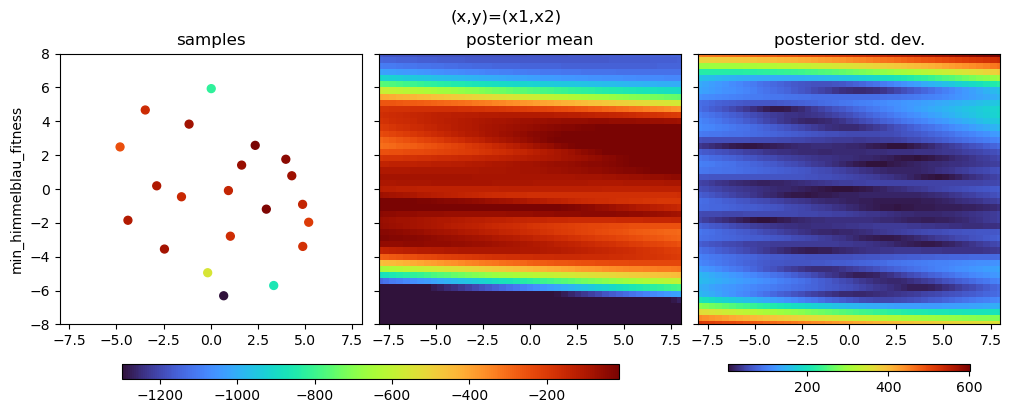

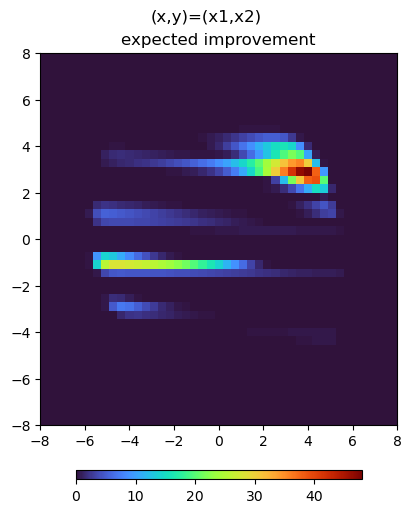

In [7]:
agent.plot_tasks()
agent.plot_acquisition(strategy=["ei", "pi", "ucb"])

The agent will naturally explore the whole parameter space



Transient Scan ID: 6     Time: 2023-07-16 19:49:27
Persistent Unique Scan ID: '9a738b93-0780-493a-bc13-984558a6fa7f'
New stream: 'primary'
+-----------+------------+------------+------------+
|   seq_num |       time |         x1 |         x2 |
+-----------+------------+------------+------------+
|         1 | 19:49:27.8 |      4.061 |      2.828 |
+-----------+------------+------------+------------+
generator list_scan ['9a738b93'] (scan num: 6)





/usr/share/miniconda3/envs/bloptools-py3.10/lib/python3.10/site-packages/botorch/models/utils/assorted.py:201: InputDataWarning: Input data is not standardized. Please consider scaling the input to zero mean and unit variance.
  warnings.warn(msg, InputDataWarning)




Transient Scan ID: 7     Time: 2023-07-16 19:49:31
Persistent Unique Scan ID: '6660d1ef-82c6-4702-a270-ef45fc67d49c'
New stream: 'primary'
+-----------+------------+------------+------------+
|   seq_num |       time |         x1 |         x2 |
+-----------+------------+------------+------------+
|         1 | 19:49:31.4 |      0.177 |      2.894 |
+-----------+------------+------------+------------+
generator list_scan ['6660d1ef'] (scan num: 7)





/usr/share/miniconda3/envs/bloptools-py3.10/lib/python3.10/site-packages/botorch/models/utils/assorted.py:201: InputDataWarning: Input data is not standardized. Please consider scaling the input to zero mean and unit variance.
  warnings.warn(msg, InputDataWarning)




Transient Scan ID: 8     Time: 2023-07-16 19:49:35
Persistent Unique Scan ID: '5f3efaa1-ff09-47e2-99dc-8e3503ed93e9'
New stream: 'primary'
+-----------+------------+------------+------------+
|   seq_num |       time |         x1 |         x2 |
+-----------+------------+------------+------------+
|         1 | 19:49:35.0 |      3.154 |      2.305 |
+-----------+------------+------------+------------+
generator list_scan ['5f3efaa1'] (scan num: 8)





/usr/share/miniconda3/envs/bloptools-py3.10/lib/python3.10/site-packages/botorch/models/utils/assorted.py:201: InputDataWarning: Input data is not standardized. Please consider scaling the input to zero mean and unit variance.
  warnings.warn(msg, InputDataWarning)




Transient Scan ID: 9     Time: 2023-07-16 19:49:38
Persistent Unique Scan ID: '78dd9750-8768-4665-ae96-078957ba6c1b'
New stream: 'primary'
+-----------+------------+------------+------------+
|   seq_num |       time |         x1 |         x2 |
+-----------+------------+------------+------------+
|         1 | 19:49:38.7 |     -4.650 |      1.038 |
+-----------+------------+------------+------------+
generator list_scan ['78dd9750'] (scan num: 9)





/usr/share/miniconda3/envs/bloptools-py3.10/lib/python3.10/site-packages/botorch/models/utils/assorted.py:201: InputDataWarning: Input data is not standardized. Please consider scaling the input to zero mean and unit variance.
  warnings.warn(msg, InputDataWarning)




Transient Scan ID: 10     Time: 2023-07-16 19:49:42
Persistent Unique Scan ID: '759d08ef-4d85-4d50-9e29-75fad6942831'
New stream: 'primary'
+-----------+------------+------------+------------+
|   seq_num |       time |         x1 |         x2 |
+-----------+------------+------------+------------+
|         1 | 19:49:42.1 |      1.007 |     -1.341 |
+-----------+------------+------------+------------+
generator list_scan ['759d08ef'] (scan num: 10)





/usr/share/miniconda3/envs/bloptools-py3.10/lib/python3.10/site-packages/botorch/models/utils/assorted.py:201: InputDataWarning: Input data is not standardized. Please consider scaling the input to zero mean and unit variance.
  warnings.warn(msg, InputDataWarning)




Transient Scan ID: 11     Time: 2023-07-16 19:49:45
Persistent Unique Scan ID: '0ace75c9-e931-411c-a748-e706d20404b4'
New stream: 'primary'
+-----------+------------+------------+------------+
|   seq_num |       time |         x1 |         x2 |
+-----------+------------+------------+------------+
|         1 | 19:49:45.5 |     -4.125 |     -2.876 |
+-----------+------------+------------+------------+
generator list_scan ['0ace75c9'] (scan num: 11)





/usr/share/miniconda3/envs/bloptools-py3.10/lib/python3.10/site-packages/botorch/models/utils/assorted.py:201: InputDataWarning: Input data is not standardized. Please consider scaling the input to zero mean and unit variance.
  warnings.warn(msg, InputDataWarning)




Transient Scan ID: 12     Time: 2023-07-16 19:49:48
Persistent Unique Scan ID: '19aba327-b614-4710-b508-47fdad41bb26'
New stream: 'primary'
+-----------+------------+------------+------------+
|   seq_num |       time |         x1 |         x2 |
+-----------+------------+------------+------------+
|         1 | 19:49:48.9 |      4.729 |      2.115 |
+-----------+------------+------------+------------+
generator list_scan ['19aba327'] (scan num: 12)





/usr/share/miniconda3/envs/bloptools-py3.10/lib/python3.10/site-packages/botorch/models/utils/assorted.py:201: InputDataWarning: Input data is not standardized. Please consider scaling the input to zero mean and unit variance.
  warnings.warn(msg, InputDataWarning)




Transient Scan ID: 13     Time: 2023-07-16 19:49:52
Persistent Unique Scan ID: '825df222-47cd-474c-9294-bf18b447f525'
New stream: 'primary'
+-----------+------------+------------+------------+
|   seq_num |       time |         x1 |         x2 |
+-----------+------------+------------+------------+
|         1 | 19:49:52.2 |      2.895 |      1.807 |
+-----------+------------+------------+------------+
generator list_scan ['825df222'] (scan num: 13)





/usr/share/miniconda3/envs/bloptools-py3.10/lib/python3.10/site-packages/botorch/models/utils/assorted.py:201: InputDataWarning: Input data is not standardized. Please consider scaling the input to zero mean and unit variance.
  warnings.warn(msg, InputDataWarning)




Transient Scan ID: 14     Time: 2023-07-16 19:49:56
Persistent Unique Scan ID: 'db0e6184-4758-43d6-9a33-6c91451e1c70'
New stream: 'primary'
+-----------+------------+------------+------------+
|   seq_num |       time |         x1 |         x2 |
+-----------+------------+------------+------------+
|         1 | 19:49:56.1 |     -4.503 |     -3.489 |
+-----------+------------+------------+------------+
generator list_scan ['db0e6184'] (scan num: 14)





/usr/share/miniconda3/envs/bloptools-py3.10/lib/python3.10/site-packages/botorch/models/utils/assorted.py:201: InputDataWarning: Input data is not standardized. Please consider scaling the input to zero mean and unit variance.
  warnings.warn(msg, InputDataWarning)




Transient Scan ID: 15     Time: 2023-07-16 19:49:59
Persistent Unique Scan ID: '6308091b-d055-4350-98c8-c7368580c34f'
New stream: 'primary'
+-----------+------------+------------+------------+
|   seq_num |       time |         x1 |         x2 |
+-----------+------------+------------+------------+
|         1 | 19:49:59.8 |     -5.361 |     -2.790 |
+-----------+------------+------------+------------+
generator list_scan ['6308091b'] (scan num: 15)





/usr/share/miniconda3/envs/bloptools-py3.10/lib/python3.10/site-packages/botorch/models/utils/assorted.py:201: InputDataWarning: Input data is not standardized. Please consider scaling the input to zero mean and unit variance.
  warnings.warn(msg, InputDataWarning)




Transient Scan ID: 16     Time: 2023-07-16 19:50:03
Persistent Unique Scan ID: 'a0cbebdf-ad9a-4dd2-b30f-a05f2e54246f'
New stream: 'primary'
+-----------+------------+------------+------------+
|   seq_num |       time |         x1 |         x2 |
+-----------+------------+------------+------------+
|         1 | 19:50:03.2 |     -2.028 |      2.704 |
+-----------+------------+------------+------------+
generator list_scan ['a0cbebdf'] (scan num: 16)





/usr/share/miniconda3/envs/bloptools-py3.10/lib/python3.10/site-packages/botorch/models/utils/assorted.py:201: InputDataWarning: Input data is not standardized. Please consider scaling the input to zero mean and unit variance.
  warnings.warn(msg, InputDataWarning)




Transient Scan ID: 17     Time: 2023-07-16 19:50:06
Persistent Unique Scan ID: 'a005ab30-2667-4059-926b-126576495a66'
New stream: 'primary'
+-----------+------------+------------+------------+
|   seq_num |       time |         x1 |         x2 |
+-----------+------------+------------+------------+
|         1 | 19:50:06.6 |      3.090 |      0.158 |
+-----------+------------+------------+------------+
generator list_scan ['a005ab30'] (scan num: 17)





/usr/share/miniconda3/envs/bloptools-py3.10/lib/python3.10/site-packages/botorch/models/utils/assorted.py:201: InputDataWarning: Input data is not standardized. Please consider scaling the input to zero mean and unit variance.
  warnings.warn(msg, InputDataWarning)




Transient Scan ID: 18     Time: 2023-07-16 19:50:09
Persistent Unique Scan ID: 'b1a18f1d-0d06-493e-8f52-227d9faadd1a'
New stream: 'primary'
+-----------+------------+------------+------------+
|   seq_num |       time |         x1 |         x2 |
+-----------+------------+------------+------------+
|         1 | 19:50:10.0 |     -3.216 |     -2.594 |
+-----------+------------+------------+------------+
generator list_scan ['b1a18f1d'] (scan num: 18)





/usr/share/miniconda3/envs/bloptools-py3.10/lib/python3.10/site-packages/botorch/models/utils/assorted.py:201: InputDataWarning: Input data is not standardized. Please consider scaling the input to zero mean and unit variance.
  warnings.warn(msg, InputDataWarning)




Transient Scan ID: 19     Time: 2023-07-16 19:50:13
Persistent Unique Scan ID: '8f7bfa15-d957-474b-a563-722be01abe36'
New stream: 'primary'
+-----------+------------+------------+------------+
|   seq_num |       time |         x1 |         x2 |
+-----------+------------+------------+------------+
|         1 | 19:50:13.4 |     -3.736 |     -3.374 |
+-----------+------------+------------+------------+
generator list_scan ['8f7bfa15'] (scan num: 19)





/usr/share/miniconda3/envs/bloptools-py3.10/lib/python3.10/site-packages/botorch/models/utils/assorted.py:201: InputDataWarning: Input data is not standardized. Please consider scaling the input to zero mean and unit variance.
  warnings.warn(msg, InputDataWarning)




Transient Scan ID: 20     Time: 2023-07-16 19:50:16
Persistent Unique Scan ID: 'ddedcfa7-0072-4557-9de8-ccfc30d3d162'
New stream: 'primary'
+-----------+------------+------------+------------+
|   seq_num |       time |         x1 |         x2 |
+-----------+------------+------------+------------+
|         1 | 19:50:16.7 |     -2.500 |      3.403 |
+-----------+------------+------------+------------+
generator list_scan ['ddedcfa7'] (scan num: 20)





/usr/share/miniconda3/envs/bloptools-py3.10/lib/python3.10/site-packages/botorch/models/utils/assorted.py:201: InputDataWarning: Input data is not standardized. Please consider scaling the input to zero mean and unit variance.
  warnings.warn(msg, InputDataWarning)




Transient Scan ID: 21     Time: 2023-07-16 19:50:20
Persistent Unique Scan ID: 'ca5cab2e-f6a9-4b18-b5d5-3c64f90e84bb'
New stream: 'primary'
+-----------+------------+------------+------------+
|   seq_num |       time |         x1 |         x2 |
+-----------+------------+------------+------------+
|         1 | 19:50:20.0 |      3.184 |      1.147 |
+-----------+------------+------------+------------+
generator list_scan ['ca5cab2e'] (scan num: 21)





/usr/share/miniconda3/envs/bloptools-py3.10/lib/python3.10/site-packages/botorch/models/utils/assorted.py:201: InputDataWarning: Input data is not standardized. Please consider scaling the input to zero mean and unit variance.
  warnings.warn(msg, InputDataWarning)


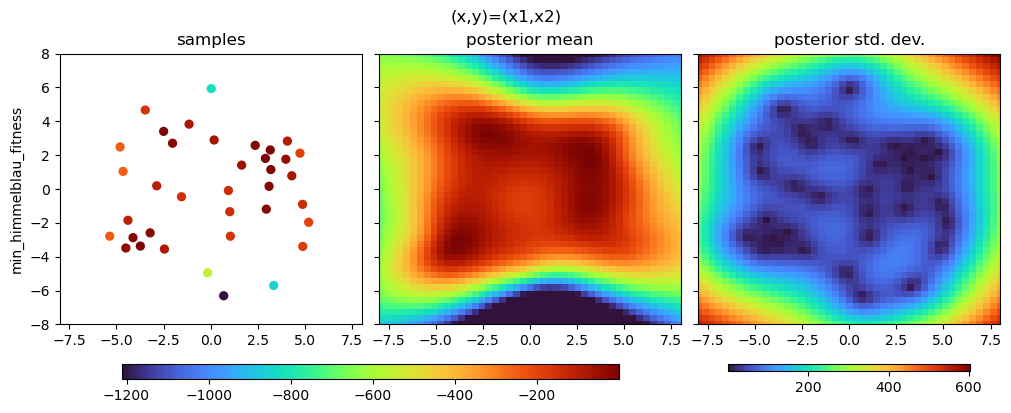

In [8]:
RE(agent.learn("ei", n_iter=16))
agent.plot_tasks()